# EDA - Farmacoviligilancia
## 0. Previos

Se cargan las bases y las librerías a utilizar.

In [2]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Base de interés
base = pd.read_excel('C:/Users/monic/documentos/ds4a/project/data/Farmacovigilancia RAM.xlsx')
base.head()

,FECHA_NOTIFICACION,DEPARTAMENTO,MUNICIPIO,EPS,ETNIA,FECHA_NACIMIENTO,EDAD,TIPO_IDENTIFICACION,NRO_IDENTIFICACION,SEXO,...,EVOLUCION,SERIEDAD,EVENTO_PRESENTO_DESPUES_ADMINISTRAR_MEDICAMENTO,EXISTEN_OTROS_FACTORES_PUEDAN_EXPLICAR_EVENTO,EVENTO_DESAPARECIO_DISMINUIR_SUSP_MED,PACIENTE_HABIA_PRESENTADO_MISMA_REACION_MEDIC,CAUSALIDAD_SEGUN_ALGORITMO_DE_NARANJO,EVITABILIDAD,GRAVEDAD,DS_PLAN_INTERVENCION
0,2013-08-05,ANTIOQUIA,GIRARDOTA,EPS/SURA,MESTIZO,1977-09-06,42,CC,1706844,F,...,RECUPERADO SIN SECUELAS,OTROS,SI,SI,NO SABE,NO SABE,POSIBLE,NaN,LEVE,SE LE INDICA A LA PACIENTE USAR SUS MEDICAMENT...
1,2013-03-05,ANTIOQUIA,ITAGUI,EPS/SURA,MESTIZO,1972-09-09,47,CC,1452148,F,...,RECUPERADO SIN SECUELAS,DESCONOCIDO,SI,SI,NO,SI,POSIBLE,NO,MODERADA,SE EXPLICA IMPORTANCIA A LA PACIENTE DE NUNCA ...
2,2013-03-06,ANTIOQUIA,MEDELLIN,EPS/SURA,MESTIZO,1966-10-02,53,CC,730790,F,...,RECUPERADO SIN SECUELAS,OTROS,SI,SI,NO SABE,NO,POSIBLE,NO,MODERADA,SE COMUNICARA CASO AL MEDICO TRATANTE
3,2013-03-06,ANTIOQUIA,RIONEGRO,EPS/SURA,MESTIZO,1982-12-24,37,CC,738900,F,...,RECUPERADO SIN SECUELAS,OTROS,SI,SI,NO SABE,SI,POSIBLE,NO,MODERADA,CONTINUAR EN SFT
4,2013-08-15,ANTIOQUIA,BELLO,EPS/SURA,MESTIZO,1974-08-21,45,CC,1479905,M,...,RECUPERADO SIN SECUELAS,OTROS,NaN,NaN,NO SABE,NO SABE,POSIBLE,NO,LEVE,PACIENTE QUE ENTIENDE RIESGO BENEFICIO DE LA A...


In [4]:
# Base de ids
ids = pd.read_excel('C:/Users/monic/documentos/ds4a/project/data/Datos basicos.xlsx')
ids.head()

,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
0,500547,58.0,M,SECUNDARIA,CASADO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1962-05-19 00:00:00
1,500588,15.0,M,PRIMARIA,SOLTERO (A),NaN,CUNDINAMARCA,BOGOTA,2.0,URBANA,MADRE,B,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2004-12-19 00:00:00
2,502989,29.0,M,UNIVERSITARIO,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,1990-08-22 00:00:00
3,506808,11.0,M,EDAD PREESCOLAR,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,BELLO,1.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2008-10-06 00:00:00
4,512938,22.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1997-10-15 00:00:00


## 1. Tipos

In [5]:
base.describe()

,EDAD,NRO_IDENTIFICACION,PESO,ESTATURA
count,309.000000,3.090000e+02,309.000000,309.000000
mean,37.498382,1.252824e+06,62.870227,150.559871
std,16.363093,4.187689e+05,23.414999,33.698826
min,6.000000,5.255400e+05,0.000000,0.000000
25%,26.000000,9.042490e+05,54.000000,152.000000
50%,37.000000,1.240215e+06,65.000000,158.000000
75%,49.000000,1.590255e+06,75.000000,165.000000
max,81.000000,1.998401e+06,164.000000,187.000000


In [6]:
base.dtypes

FECHA_NOTIFICACION                                 datetime64[ns]
DEPARTAMENTO                                               object
MUNICIPIO                                                  object
EPS                                                        object
ETNIA                                                      object
FECHA_NACIMIENTO                                   datetime64[ns]
EDAD                                                        int64
TIPO_IDENTIFICACION                                        object
NRO_IDENTIFICACION                                          int64
SEXO                                                       object
PESO                                                      float64
ESTATURA                                                    int64
DIAGNOSTICO_PPAL_CONDICIONES_CLINICAS                      object
MEDICAMENTO_SOSPECHOSO                                     object
INDICACION                                                 object
FECHA_INIC

Los tipos son consistentes con lo esperado.

## 2. Aporte Conceptual

Se requiere verificar con Omnivida la información que se encuentra en la tabla.

## 3. Calidad
### 3.6 Cruce con la tabla de identificaciones

In [7]:
# Identificaciones únicas en la tabla de pacientes: 872
ids_unicos = ids.groupby(['ID'])['edad'].count().reset_index()
ids_unicos.describe()

,ID,edad
count,8.720000e+02,872.000000
mean,1.259526e+06,1.017202
std,4.343817e+05,0.138642
min,5.005470e+05,1.000000
25%,8.887368e+05,1.000000
50%,1.258122e+06,1.000000
75%,1.647997e+06,1.000000
max,1.999629e+06,3.000000


In [8]:
# Identificaciones únias en la tabla de Calidad: 146
id_column = 'NRO_IDENTIFICACION'
ids_base = base.groupby([id_column])['DEPARTAMENTO'].count().reset_index(name = 'cuenta')
ids_base.describe()

,NRO_IDENTIFICACION,cuenta
count,2.170000e+02,217.000000
mean,1.254720e+06,1.423963
std,4.133984e+05,0.742229
min,5.255400e+05,1.000000
25%,9.238580e+05,1.000000
50%,1.237493e+06,1.000000
75%,1.580990e+06,2.000000
max,1.998401e+06,5.000000


In [9]:
# Cruce de las dos tablas
cruce = ids_base.merge(ids_unicos, how = 'inner', left_on = id_column, right_on ='ID')
cruce.describe()

,NRO_IDENTIFICACION,cuenta,ID,edad
count,2.170000e+02,217.000000,2.170000e+02,217.000000
mean,1.254720e+06,1.423963,1.254720e+06,1.013825
std,4.133984e+05,0.742229,4.133984e+05,0.117034
min,5.255400e+05,1.000000,5.255400e+05,1.000000
25%,9.238580e+05,1.000000,9.238580e+05,1.000000
50%,1.237493e+06,1.000000,1.237493e+06,1.000000
75%,1.580990e+06,2.000000,1.580990e+06,1.000000
max,1.998401e+06,5.000000,1.998401e+06,2.000000


Se encuentra que todos los pacientes de la tabla de calidad están en la tabla de datos demográficos. 

## 4. Exploración
### 4.1 Distribuciones

In [10]:
base.columns

Index(['FECHA_NOTIFICACION', 'DEPARTAMENTO', 'MUNICIPIO', 'EPS', 'ETNIA',
       'FECHA_NACIMIENTO', 'EDAD', 'TIPO_IDENTIFICACION', 'NRO_IDENTIFICACION',
       'SEXO', 'PESO', 'ESTATURA', 'DIAGNOSTICO_PPAL_CONDICIONES_CLINICAS',
       'MEDICAMENTO_SOSPECHOSO', 'INDICACION', 'FECHA_INICIO_TRATAMIENTO',
       'FECHA_FIN_TRATAMIENTO', 'COMERCIAL', 'FECHA_INICIO_REACCION',
       'RAM_SOSPECHADA', 'SISTEMA_COMPROMETIDO', 'ANALISIS', 'EVOLUCION',
       'SERIEDAD', 'EVENTO_PRESENTO_DESPUES_ADMINISTRAR_MEDICAMENTO',
       'EXISTEN_OTROS_FACTORES_PUEDAN_EXPLICAR_EVENTO',
       'EVENTO_DESAPARECIO_DISMINUIR_SUSP_MED',
       'PACIENTE_HABIA_PRESENTADO_MISMA_REACION_MEDIC',
       'CAUSALIDAD_SEGUN_ALGORITMO_DE_NARANJO', 'EVITABILIDAD', 'GRAVEDAD',
       'DS_PLAN_INTERVENCION'],
      dtype='object')

Se asume que las variables `DEPARTAMENTO`, `MUNICIPIO`, `EPS`, `ETNIA`, `FECHA_NACIMIENTO`, `EDAD`, `TIPO_IDENTIFICACION`, `NRO_IDENTIFICACION`, `SEXO` se analizarán con la base de demográficos.

### PESO y ESTATURA

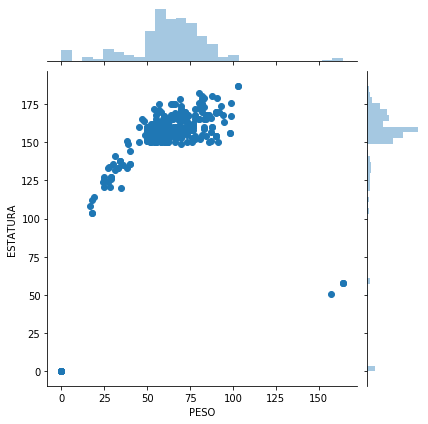

In [16]:
sns.jointplot(x="PESO", y="ESTATURA", data=base)

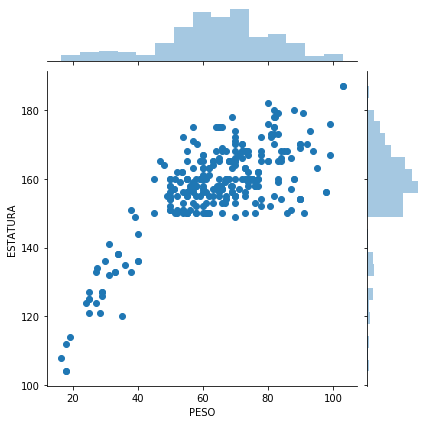

In [17]:
base_100 = base[base['ESTATURA']>=100]
sns.jointplot(x="PESO", y="ESTATURA", data=base_100)#, kind="hex")

As we can see when `PESO` is lower than 50 there is a positive correlation between those two variables. Nevertheless after that value `ESTATURA` y `PESO` does not have that strong relationship. Maybe could be interesting to calculate $IMC$.

### DIAGNOSTICO_PPAL_CONDICIONES_CLINICAS

In [18]:
base['DIAGNOSTICO_PPAL_CONDICIONES_CLINICAS'].unique()

array([' ASMA PREDOMINANTEMENTE ALERGICA [9601] ',
       ' ARTRITIS JUVENIL, NO ESPECIFICADA [10500] / EDEMA ANGIONEUROTICO [14271] / URTICARIA, NO ESPECIFICADA [10262] / GASTRITIS, NO ESPECIFICADA [9865] / NAUSEA Y VOMITO [12848] ',
       ' ASMA PREDOMINANTEMENTE ALERGICA [9601] / PANSINUSITIS CRONICA [9552] / DOLOR EN MIEMBRO [10858] / ENFERMEDAD DE PARKINSON [8426] / HIPOTIROIDISMO, NO ESPECIFICADO [7633] ',
       ' ARTRITIS REUMATOIDE, NO ESPECIFICADA [10486] / ASMA PREDOMINANTEMENTE ALERGICA [9601] / INFECCION DE VIAS URINARIAS, SITIO NO ESPECIFICADO [11186] / ASMA, NO ESPECIFICADA [9604] / ENFERMEDADES REUMATICAS DEL ENDOCARDIO, VALVULA NO ESPECIFICADA [9115] / RINITIS ALERGICA, NO ESPECIFICADA [9544] ',
       ' ENFERMEDAD DEL REFLUJO GASTROESOFAGICO SIN ESOFAGITIS [9809] / OTRAS VASCULITIS LIMITADAS DE LA PIEL [10437] / OTRAS ARTRITIS REUMATOIDEAS ESPECIFICADAS [10485] / HIPERLIPIDEMIA NO ESPECIFICADA [7912] / OTRAS URTICARIAS [10261] ',
       ' EOSINOFILIA PULMONAR, NO CLA

Hay demasiadas categorías diferentes, se puede hacer un análisis más profundo para entender si se debe tomar sólo el numérico.

## MEDICAMENTO_SOSPECHOSO

In [19]:
base['MEDICAMENTO_SOSPECHOSO'].unique()

array(['FORMOTEROL  FUMARATO + BUDESONIDA 320 MCG + 9 MCG  POLVO PARA INHALACIÓN',
       'CICLOSPORINA 50 MG/ML SOLUCION INYECTABLE',
       'OMALIZUMAB 150 MG/ 1.2 ML POLVO PARA RECONSTITUIR A SALUCIÓN INYECTABLE',
       'MONTELUKAST SÓDICO 10 MG TABLETA ',
       'SALMETEROL XINAFOATO + FLUTICASONA PROPIONATO 25 MCG + 250 MCG SUSPENSIÓN PARA INHALACIÓN',
       nan,
       'INMUNOGLOBINA G HUMANA NORMAL 50 MG/ML POLVO PARA RECONSTITUIR A SOLUCIÓN INYECTABLE',
       'FORMOTEROL  FUMARATO + BUDESONIDA 160 MCG + 4.5 MCG  POLVO PARA INHALACIÓN',
       'INMUNOGLOBULINA HUMANA 6 G POLVO PARA RECONSTITUIR A SOLUCIÓN INYECTABLE',
       'TRIMETOPRIM + SULFAMETOXAZOL 80 MG + 400 MG TABLETA',
       'OMALIZUMAB 150MG /1ML SLN INYECTABLE ',
       'FEXOFENADINA 180 MG 180 MG + TABLETA RECUBIERTA',
       'BENRALIZUMAB 30MG + SLN INYECTABLE',
       'DUPILUMAB 300MG/2ML JERINGA PRELLENA (DUPIXENT)   300 MG SOLUCION INYECTABLE ',
       'BECLOMETASONA DIPROPIONATO 50 MCG SPRAY NASAL',
       

In [27]:
base['MEDICAMENTO_SOSPECHOSO_1w'] = base['MEDICAMENTO_SOSPECHOSO'].apply( lambda x : str(x).split(' ')[0])

In [29]:
base['MEDICAMENTO_SOSPECHOSO_1w'].unique()

array(['FORMOTEROL', 'CICLOSPORINA', 'OMALIZUMAB', 'MONTELUKAST',
       'SALMETEROL', 'nan', 'INMUNOGLOBINA', 'INMUNOGLOBULINA',
       'TRIMETOPRIM', 'FEXOFENADINA', 'BENRALIZUMAB', 'DUPILUMAB',
       'BECLOMETASONA', 'MEPOLIZUMAB', 'OLODATEROL'], dtype=object)

In [33]:
bg

,MEDICAMENTO_SOSPECHOSO_1w,cuenta
0,BECLOMETASONA,1
1,BENRALIZUMAB,25
2,CICLOSPORINA,1
3,DUPILUMAB,18
4,FEXOFENADINA,1
5,FORMOTEROL,2
6,INMUNOGLOBINA,1
7,INMUNOGLOBULINA,2
8,MEPOLIZUMAB,12
9,MONTELUKAST,1


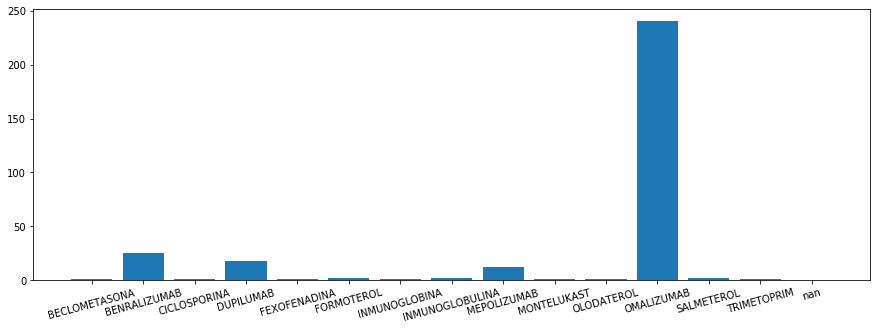

In [93]:
bg = base.groupby('MEDICAMENTO_SOSPECHOSO_1w')['MEDICAMENTO_SOSPECHOSO'].count().reset_index(name='cuenta')

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(bg['MEDICAMENTO_SOSPECHOSO_1w'], bg['cuenta'] )
_ = plt.xticks(rotation=15)
plt.grid()

As we can see, most of the observations are for `OMALIZUMAB`

### INDICATION

In [21]:
base['INDICACION'].unique()

array(['ASMA PREDOMINANTEMENTE ALERGICA [ 9601 ]',
       'EDEMA ANGIONEUROTICO [ 14271 ]', 'ASMA, NO ESPECIFICADA [ 9604 ]',
       'OTRAS VASCULITIS LIMITADAS DE LA PIEL [ 10437 ]', ' [ 0 ]',
       'HIPOGAMMAGLOBULINEMIA NO FAMILIAR [ 7571 ]',
       'OTRAS URTICARIAS [ 10261 ]',
       'URTICARIA, NO ESPECIFICADA [ 10262 ]', 'ASMA MIXTA [ 9603 ]',
       'URTICARIA ALERGICA [ 10254 ]', 'URTICARIA IDIOPATICA [ 10255 ]',
       'URTICARIA DEBIDA AL CALOR Y AL FRIO [ 10256 ]',
       'OTRAS INMUNODEFICIENCIAS ESPECIFICADAS [ 7604 ]',
       'RINOFARINGITIS AGUDA (RESFRIADO COMUN) [ 9469 ]',
       'RINITIS ALERGICA, NO ESPECIFICADA [ 9544 ]',
       'HIPOGAMMAGLOBULINEMIA TRANSITORIA DE LA INFANCIA [ 7577 ]',
       'URTICARIA DERMATOGRAFICA [ 10257 ]', 'ASMA NO ALERGICA [ 9602 ]'],
      dtype=object)

In [44]:
bg = base.groupby(['MEDICAMENTO_SOSPECHOSO_1w','INDICACION'])['MEDICAMENTO_SOSPECHOSO'].count().reset_index(name='cuenta')
bg

,MEDICAMENTO_SOSPECHOSO_1w,INDICACION,cuenta
0,BECLOMETASONA,"ASMA, NO ESPECIFICADA [ 9604 ]",1
1,BENRALIZUMAB,ASMA MIXTA [ 9603 ],7
2,BENRALIZUMAB,ASMA NO ALERGICA [ 9602 ],1
3,BENRALIZUMAB,ASMA PREDOMINANTEMENTE ALERGICA [ 9601 ],10
4,BENRALIZUMAB,"ASMA, NO ESPECIFICADA [ 9604 ]",7
5,CICLOSPORINA,EDEMA ANGIONEUROTICO [ 14271 ],1
6,DUPILUMAB,ASMA PREDOMINANTEMENTE ALERGICA [ 9601 ],7
7,DUPILUMAB,"ASMA, NO ESPECIFICADA [ 9604 ]",11
8,FEXOFENADINA,ASMA PREDOMINANTEMENTE ALERGICA [ 9601 ],1
9,FORMOTEROL,ASMA PREDOMINANTEMENTE ALERGICA [ 9601 ],2


In [50]:
bg2 = bg[bg['cuenta']>1].groupby(['INDICACION'])['cuenta'].sum().reset_index(name='cuenta').\
    sort_values('cuenta', ascending = False)
bg2

,INDICACION,cuenta
1,ASMA PREDOMINANTEMENTE ALERGICA [ 9601 ],126
2,"ASMA, NO ESPECIFICADA [ 9604 ]",79
6,"URTICARIA, NO ESPECIFICADA [ 10262 ]",38
0,ASMA MIXTA [ 9603 ],12
3,OTRAS URTICARIAS [ 10261 ],12
4,URTICARIA ALERGICA [ 10254 ],12
5,URTICARIA IDIOPATICA [ 10255 ],11


We can stay with these five categories. Other can stay as other.

In [54]:
base_ = base.merge( bg2, how = 'left')
base_.head()

,FECHA_NOTIFICACION,DEPARTAMENTO,MUNICIPIO,EPS,ETNIA,FECHA_NACIMIENTO,EDAD,TIPO_IDENTIFICACION,NRO_IDENTIFICACION,SEXO,...,EVENTO_PRESENTO_DESPUES_ADMINISTRAR_MEDICAMENTO,EXISTEN_OTROS_FACTORES_PUEDAN_EXPLICAR_EVENTO,EVENTO_DESAPARECIO_DISMINUIR_SUSP_MED,PACIENTE_HABIA_PRESENTADO_MISMA_REACION_MEDIC,CAUSALIDAD_SEGUN_ALGORITMO_DE_NARANJO,EVITABILIDAD,GRAVEDAD,DS_PLAN_INTERVENCION,MEDICAMENTO_SOSPECHOSO_1w,cuenta
0,2013-08-05,ANTIOQUIA,GIRARDOTA,EPS/SURA,MESTIZO,1977-09-06,42,CC,1706844,F,...,SI,SI,NO SABE,NO SABE,POSIBLE,NaN,LEVE,SE LE INDICA A LA PACIENTE USAR SUS MEDICAMENT...,FORMOTEROL,126.0
1,2013-03-05,ANTIOQUIA,ITAGUI,EPS/SURA,MESTIZO,1972-09-09,47,CC,1452148,F,...,SI,SI,NO,SI,POSIBLE,NO,MODERADA,SE EXPLICA IMPORTANCIA A LA PACIENTE DE NUNCA ...,CICLOSPORINA,NaN
2,2013-03-06,ANTIOQUIA,MEDELLIN,EPS/SURA,MESTIZO,1966-10-02,53,CC,730790,F,...,SI,SI,NO SABE,NO,POSIBLE,NO,MODERADA,SE COMUNICARA CASO AL MEDICO TRATANTE,OMALIZUMAB,126.0
3,2013-03-06,ANTIOQUIA,RIONEGRO,EPS/SURA,MESTIZO,1982-12-24,37,CC,738900,F,...,SI,SI,NO SABE,SI,POSIBLE,NO,MODERADA,CONTINUAR EN SFT,MONTELUKAST,79.0
4,2013-08-15,ANTIOQUIA,BELLO,EPS/SURA,MESTIZO,1974-08-21,45,CC,1479905,M,...,NaN,NaN,NO SABE,NO SABE,POSIBLE,NO,LEVE,PACIENTE QUE ENTIENDE RIESGO BENEFICIO DE LA A...,OMALIZUMAB,NaN


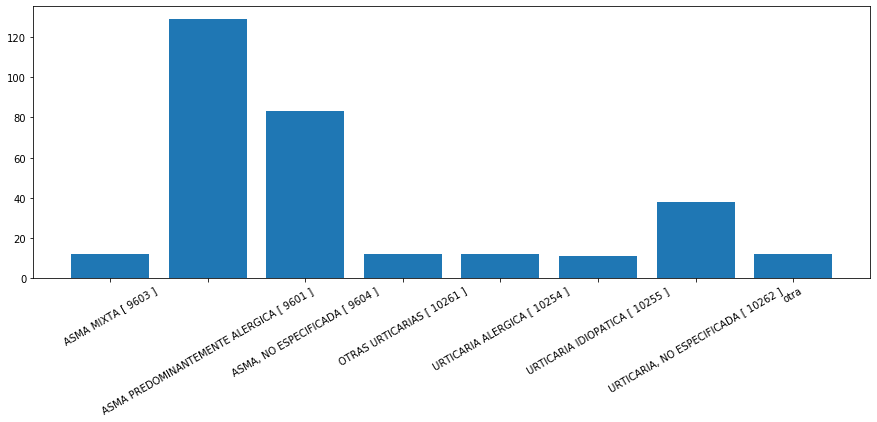

In [74]:
import math

base_['INDICACION_CAT']=base_.apply( lambda x : 'otra' if math.isnan(x['cuenta']) else x['INDICACION'] , axis = 1  )
bg = base_.groupby('INDICACION_CAT')['DEPARTAMENTO'].count().reset_index(name='cuenta')

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(bg['INDICACION_CAT'], bg['cuenta'] )
_ = plt.xticks(rotation=30)

### FECHA_INICIO_TRATAMIENTO y FECHA_FIN_TRATAMIENTO

In [78]:
base_['FECHA_INICIO_TRATAMIENTO_ym'] = base_['FECHA_INICIO_TRATAMIENTO'].apply( lambda x: x.year * 100 + x.month )
base_['FECHA_FIN_TRATAMIENTO_ym']    = base_['FECHA_FIN_TRATAMIENTO'].apply( lambda x: x.year * 100 + x.month )
base_[['FECHA_INICIO_TRATAMIENTO_ym','FECHA_FIN_TRATAMIENTO_ym']].describe()

,FECHA_INICIO_TRATAMIENTO_ym,FECHA_FIN_TRATAMIENTO_ym
count,308.000000,138.000000
mean,201659.672078,201787.108696
std,232.217647,81.655470
min,200901.000000,201301.000000
25%,201505.000000,201805.000000
50%,201612.000000,201805.000000
75%,201905.250000,201806.000000
max,202004.000000,201912.000000


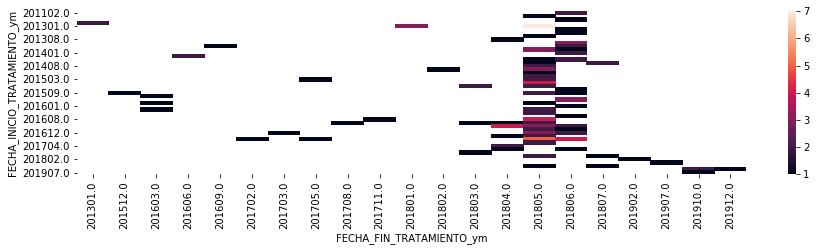

In [82]:
bg = base_.groupby(['FECHA_INICIO_TRATAMIENTO_ym','FECHA_FIN_TRATAMIENTO_ym'])['FECHA_INICIO_TRATAMIENTO'].count().\
    reset_index(name='cuenta')

df_gwh_pivot = bg.pivot('FECHA_INICIO_TRATAMIENTO_ym','FECHA_FIN_TRATAMIENTO_ym','cuenta')

fig, ax = plt.subplots(figsize=(15, 3))
_ = sns.heatmap( df_gwh_pivot, ax=ax )

Most of end dates are in 201805 and 201806.

### COMERCIAL

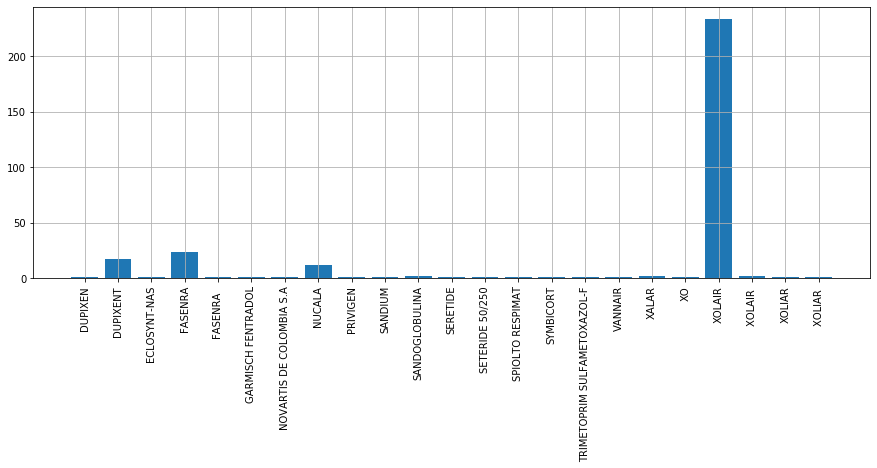

In [92]:
bg = base_.groupby('COMERCIAL')['DEPARTAMENTO'].count().reset_index(name='cuenta')

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(bg['COMERCIAL'], bg['cuenta'] )
_ = plt.xticks(rotation=90)
plt.grid(True)

The most frequent comercial is `XOLAR`. There is necesary to do some cleaning because there are some typos for this category.

In [91]:
base_['COMERCIAL_cat'] = base_['COMERCIAL'].apply( lambda x: 'XOLAIR' if str(x)[0] == 'X' else 'otro' )
base_.groupby

,FECHA_NOTIFICACION,DEPARTAMENTO,MUNICIPIO,EPS,ETNIA,FECHA_NACIMIENTO,EDAD,TIPO_IDENTIFICACION,NRO_IDENTIFICACION,SEXO,...,CAUSALIDAD_SEGUN_ALGORITMO_DE_NARANJO,EVITABILIDAD,GRAVEDAD,DS_PLAN_INTERVENCION,MEDICAMENTO_SOSPECHOSO_1w,cuenta,INDICACION_CAT,FECHA_INICIO_TRATAMIENTO_ym,FECHA_FIN_TRATAMIENTO_ym,COMERCIAL_cat
0,2013-08-05,ANTIOQUIA,GIRARDOTA,EPS/SURA,MESTIZO,1977-09-06,42,CC,1706844,F,...,POSIBLE,NaN,LEVE,SE LE INDICA A LA PACIENTE USAR SUS MEDICAMENT...,FORMOTEROL,126.0,ASMA PREDOMINANTEMENTE ALERGICA [ 9601 ],201303.0,NaN,otro
1,2013-03-05,ANTIOQUIA,ITAGUI,EPS/SURA,MESTIZO,1972-09-09,47,CC,1452148,F,...,POSIBLE,NO,MODERADA,SE EXPLICA IMPORTANCIA A LA PACIENTE DE NUNCA ...,CICLOSPORINA,NaN,otra,201210.0,201301.0,otro
2,2013-03-06,ANTIOQUIA,MEDELLIN,EPS/SURA,MESTIZO,1966-10-02,53,CC,730790,F,...,POSIBLE,NO,MODERADA,SE COMUNICARA CASO AL MEDICO TRATANTE,OMALIZUMAB,126.0,ASMA PREDOMINANTEMENTE ALERGICA [ 9601 ],201403.0,201606.0,XOLAIR
3,2013-03-06,ANTIOQUIA,RIONEGRO,EPS/SURA,MESTIZO,1982-12-24,37,CC,738900,F,...,POSIBLE,NO,MODERADA,CONTINUAR EN SFT,MONTELUKAST,79.0,"ASMA, NO ESPECIFICADA [ 9604 ]",201210.0,201301.0,XOLAIR
4,2013-08-15,ANTIOQUIA,BELLO,EPS/SURA,MESTIZO,1974-08-21,45,CC,1479905,M,...,POSIBLE,NO,LEVE,PACIENTE QUE ENTIENDE RIESGO BENEFICIO DE LA A...,OMALIZUMAB,NaN,otra,201304.0,201806.0,XOLAIR


In [75]:
base_.columns

Index(['FECHA_NOTIFICACION', 'DEPARTAMENTO', 'MUNICIPIO', 'EPS', 'ETNIA',
       'FECHA_NACIMIENTO', 'EDAD', 'TIPO_IDENTIFICACION', 'NRO_IDENTIFICACION',
       'SEXO', 'PESO', 'ESTATURA', 'DIAGNOSTICO_PPAL_CONDICIONES_CLINICAS',
       'MEDICAMENTO_SOSPECHOSO', 'INDICACION', 'FECHA_INICIO_TRATAMIENTO',
       'FECHA_FIN_TRATAMIENTO', 'COMERCIAL', 'FECHA_INICIO_REACCION',
       'RAM_SOSPECHADA', 'SISTEMA_COMPROMETIDO', 'ANALISIS', 'EVOLUCION',
       'SERIEDAD', 'EVENTO_PRESENTO_DESPUES_ADMINISTRAR_MEDICAMENTO',
       'EXISTEN_OTROS_FACTORES_PUEDAN_EXPLICAR_EVENTO',
       'EVENTO_DESAPARECIO_DISMINUIR_SUSP_MED',
       'PACIENTE_HABIA_PRESENTADO_MISMA_REACION_MEDIC',
       'CAUSALIDAD_SEGUN_ALGORITMO_DE_NARANJO', 'EVITABILIDAD', 'GRAVEDAD',
       'DS_PLAN_INTERVENCION', 'MEDICAMENTO_SOSPECHOSO_1w', 'cuenta',
       'INDICACION_CAT'],
      dtype='object')

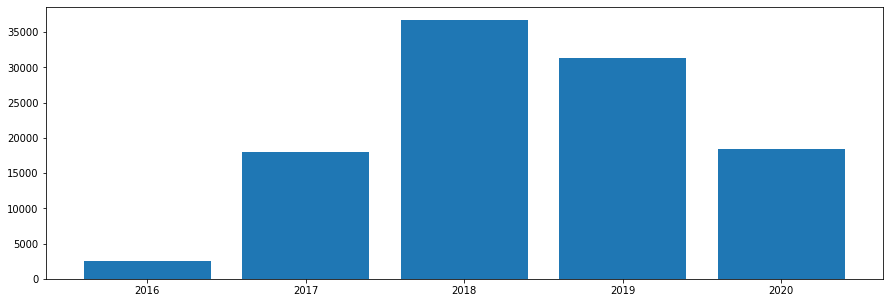

In [27]:
base_gf['year'] = base_gf['Fecha_Emision'].apply( lambda x: x.year )
base_gf_gy = base_gf.groupby('year')['Id'].sum().reset_index()


rects1 = ax.bar(base_gf_gy['year'], base_gf_gy['Id'] )

Se encuentra que la mayoría de los registros están desde 2017, no tienen una distribución uniforme desde ese momento.

### Regional_EPS_Desc

In [1]:
base_['year'] = base_['Fecha_Emision'].apply( lambda x: x.year )

base_gdy = base_.groupby(['Regional_EPS_Desc', 'year'])['Id'].count().reset_index( name = 'cuenta')
base_gdy_pivot = base_gdy.pivot('Regional_EPS_Desc', 'year', 'cuenta')

fig, ax = plt.subplots(figsize=(15, 5))
sns.factorplot(x='year', y='cuenta', hue='Regional_EPS_Desc', data=base_gdy, kind='bar')

NameError: name 'base_' is not defined

La mayor proporción de las encuestas son en Medellín, puede ser buena idea centrar los análisis para esa ciudad.

### Codigo_Prestacion_Op y Descripcion_Prestacion

In [44]:
bgp = base_.groupby(['Codigo_Prestacion_Op','Descripcion_Prestacion'])['Id'].count().reset_index(name = 'cuenta')
bgp.groupby('Codigo_Prestacion_Op')['cuenta'].count().reset_index(name='cuenta').sort_values('cuenta', ascending = False)

,Codigo_Prestacion_Op,cuenta
163,M009033,3
4,M001110,3
905,M026900,3
1400,M283104,3
414,M021043,3
...,...,...
504,M022042,1
503,M022040,1
502,M022034,1
501,M022018,1


In [45]:
bgp[bgp['Codigo_Prestacion_Op']=='M009033']

,Codigo_Prestacion_Op,Descripcion_Prestacion,cuenta
171,M009033,ACETATO DE BETAMETASONA/FOSFATO S?DICO DE BETA...,14
172,M009033,ACETATO DE BETAMETASONA/FOSFATO SÓDICO DE BETA...,68
173,M009033,BETAMETASONA BASE/BETAMETASONA ACETATO,17


In [46]:
bgp[bgp['Codigo_Prestacion_Op']=='M001110']

,Codigo_Prestacion_Op,Descripcion_Prestacion,cuenta
4,M001110,SALES DE REHIDRATACI?N ORAL DEXTROSA/CLORURO D...,24
5,M001110,SALES DE REHIDRATACIÓN ORAL,166
6,M001110,SALES DE REHIDRATACIÓN ORAL DEXTROSA/CLORURO D...,98


A pesar de que hay distintas descripciones para el mismo código, se puede entender que se está hablando del mismo medicamento. Así que se ignorará la descripción y se debe trabajar con los códigos.

De la descripción del problema, Omnivida nos informó que la primera letra de los códigos es relevante para el análisis. Ya que cuanto ésta sea una `J` significa que estamos hablando de una enfermedad relacionada con asma.

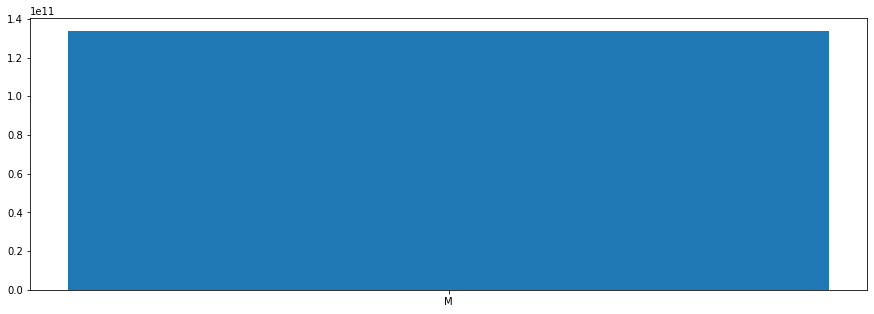

In [56]:
base_['cod_prestacion'] = base_['Codigo_Prestacion_Op'].apply( lambda x : x[0] )
base_gf_gy = base_.groupby('cod_prestacion')['Id'].sum().reset_index()

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(base_gf_gy['cod_prestacion'], base_gf_gy['Id'] )

En este caso todos los medicamentos comienzan con `M`.

### Codigo_Diagnostico_EPS_Op y Diagnostico_EPS_Desc

In [60]:
bgp = base_.groupby(['Codigo_Diagnostico_EPS_Op','Diagnostico_EPS_Desc'])['Id'].count().reset_index(name = 'cuenta')
bgp.groupby('Codigo_Diagnostico_EPS_Op')['cuenta'].count().reset_index(name='cuenta').sort_values('cuenta', ascending = False)

,Codigo_Diagnostico_EPS_Op,cuenta
1169,Z988,2
760,M255,2
188,E840,2
189,E841,2
998,R55X,2
...,...,...
412,I269,1
414,I272,1
415,I280,1
416,I351,1


In [61]:
bgp[bgp['Codigo_Diagnostico_EPS_Op']=='Z988']

,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,cuenta
1350,Z988,OTROS ESTADOS POSTQUIR?RGICOS ESPECIFICADOS,5
1351,Z988,OTROS ESTADOS POSTQUIRÚRGICOS ESPECIFICADOS,5


In [62]:
bgp[bgp['Codigo_Diagnostico_EPS_Op']=='M255']

,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,cuenta
888,M255,DOLOR EN ARTICULACI?N,14
889,M255,DOLOR EN ARTICULACIÓN,239


In this case we can see than we need to trust in the codes, given that due special characters we have duplicated descriptions. Let's analyze the first leter of the code to see if has any information.

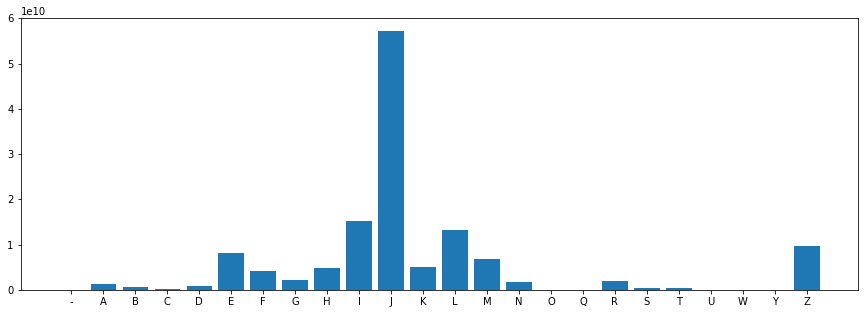

In [71]:
base_['cod_diagnostico'] = base_['Codigo_Diagnostico_EPS_Op'].apply( lambda x : str(x)[0] )
base_gf_gy = base_.groupby('cod_diagnostico')['Id'].sum().reset_index()

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(base_gf_gy['cod_diagnostico'], base_gf_gy['Id'] )

As we can see most of the diagnosis is for asma related deseases.

### Numero_Cantidad_Prestaciones

Text(0.5, 0, 'Tipo de Enferemedad')

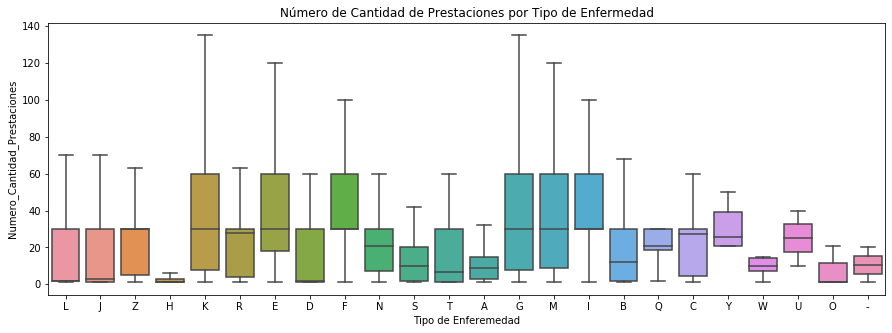

In [78]:
# Define figure size, create plot
fig, ax = plt.subplots(figsize=(15, 5))
m = sns.boxplot(
    x="cod_diagnostico",
    y="Numero_Cantidad_Prestaciones",
    #hue="cod_diagnostico",
    data=base_,
    showfliers=False,
)

# Format plot
#plt.legend(loc="lower left")
plt.title("Número de Cantidad de Prestaciones por Tipo de Enfermedad")
#plt.xticks(rotation=90)
plt.xlabel("Tipo de Enferemedad")
#plt.ylabel("PM2.5_WHO")

In [82]:
base_[base_['Numero_Cantidad_Prestaciones']>150].head()

,Id,Fecha_Emision,Regional_EPS_Desc,Codigo_Prestacion_Op,Descripcion_Prestacion,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,Numero_Cantidad_Prestaciones,ID,edad,year,cod_prestacion,cod_diagnostico
29,940545,2016-12-26,Medellin,M019569,MONTELUKAST S?DICO,J450,ASMA PREDOMINANTEMENTE AL?RGICA,180.0,940545,1,2016,M,J
40,940545,2017-02-03,Medellin,M019569,MONTELUKAST S?DICO,J450,ASMA PREDOMINANTEMENTE AL?RGICA,180.0,940545,1,2017,M,J
73,940545,2018-03-02,Medellin,M028975,MONTELUKAST SÓDICO-INDICACIONES DIFERENTES RES...,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,180.0,940545,1,2018,M,J
100,940545,2018-08-10,Medellin,M028975,MONTELUKAST SÓDICO-INDICACIONES DIFERENTES RES...,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,180.0,940545,1,2018,M,J
532,535255,2018-06-28,Medellin,M019251,DOMPERIDONA,K210,ENFERMEDAD DEL REFLUJO GASTROESOFÁGICO CON ESO...,180.0,535255,1,2018,M,K


In [83]:
base_.describe()

,Id,Numero_Cantidad_Prestaciones,ID,edad,year
count,1.069370e+05,105684.000000,1.069370e+05,106937.000000,106937.000000
mean,1.250623e+06,26.607074,1.250623e+06,1.014317,2018.422903
std,4.336494e+05,41.980133,4.336494e+05,0.135628,1.031779
min,5.005470e+05,1.000000,5.005470e+05,1.000000,2016.000000
25%,8.878120e+05,1.000000,8.878120e+05,1.000000,2018.000000
50%,1.240215e+06,10.000000,1.240215e+06,1.000000,2018.000000
75%,1.629016e+06,30.000000,1.629016e+06,1.000000,2019.000000
max,1.999629e+06,1080.000000,1.999629e+06,3.000000,2020.000000


Se encuentran valores positivos para la variable `Numero_Cantidad_Prestaciones`. Hay valores muy altos, y se ve que esto depende del tipo de enferemedad.

## 5. Definiciones Modelo de Datos
### 5.1 Transformación y Limpieza

* Esta tabla debería consolidarse a nivel ID, Fecha. Esto implica una definición de variables explicativas ya que un paciente puede aparecer más de una vez por mes.

* Si el cruce se hace por fecha (i.e. YYYYMM) es necesario realizar esta transformación en la variable `Fecha_Emision`

In [88]:
base_['month'] = base_['Fecha_Emision'].apply( lambda x: x.month )
base_.groupby(['Id','year','month'])['Fecha_Emision'].count().reset_index(name='cuenta').\
      sort_values('cuenta', ascending = False).head(10)

,Id,year,month,cuenta
7493,1090949,2020,2,63
7494,1090949,2020,3,52
7490,1090949,2019,11,49
193,524006,2017,7,47
7476,1090949,2018,8,47
1787,649629,2020,2,44
7479,1090949,2018,12,44
9015,1216245,2020,1,44
389,535255,2019,11,42
9002,1216245,2018,10,41


In [92]:
base_[ (base_['Id'] == 1090949) & (base_['year'] == 2020) & (base_['month'] == 2) ].\
    sort_values(['Codigo_Diagnostico_EPS_Op','Fecha_Emision']).head(10)

,Id,Fecha_Emision,Regional_EPS_Desc,Codigo_Prestacion_Op,Descripcion_Prestacion,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,Numero_Cantidad_Prestaciones,ID,edad,year,cod_prestacion,cod_diagnostico,month
4230,1090949,2020-02-03,Medellin,M284001,EMPAGLIFLOZINA,E108,"DIABETES MELLITUS INSULINODEPENDIENTE, CON COM...",30.0,1090949,1,2020,M,E,2
4213,1090949,2020-02-03,Medellin,M281088,ROSUVASTATINA,E109,"DIABETES MELLITUS INSULINODEPENDIENTE, SIN MEN...",30.0,1090949,1,2020,M,E,2
4211,1090949,2020-02-10,Medellin,M281330,METFORMINA,E109,"DIABETES MELLITUS INSULINODEPENDIENTE, SIN MEN...",23.0,1090949,1,2020,M,E,2
4057,1090949,2020-02-28,Medellin,M281330,METFORMINA,E109,"DIABETES MELLITUS INSULINODEPENDIENTE, SIN MEN...",30.0,1090949,1,2020,M,E,2
4072,1090949,2020-02-28,Medellin,M281088,ROSUVASTATINA,E109,"DIABETES MELLITUS INSULINODEPENDIENTE, SIN MEN...",30.0,1090949,1,2020,M,E,2
4195,1090949,2020-02-03,Medellin,M025360,LIRAGLUTIDE,E118,"DIABETES MELLITUS NO INSULINODEPENDIENTE, CON ...",3.0,1090949,1,2020,M,E,2
4212,1090949,2020-02-03,Medellin,M022134,FENOFIBRATO,E785,HIPERLIPIDEMIA NO ESPECIFICADA,30.0,1090949,1,2020,M,E,2
4191,1090949,2020-02-03,Medellin,M019665,BUPROPION,F331,"TRASTORNO DEPRESIVO RECURRENTE, EPISODIO MODER...",30.0,1090949,1,2020,M,F,2
4207,1090949,2020-02-03,Medellin,M281150,QUETIAPINA FUMARATO,F411,TRASTORNO DE ANSIEDAD GENERALIZADA,60.0,1090949,1,2020,M,F,2
4065,1090949,2020-02-28,Medellin,M281150,QUETIAPINA FUMARATO,F411,TRASTORNO DE ANSIEDAD GENERALIZADA,60.0,1090949,1,2020,M,F,2


### 5.2 Modelo de Datos

El cruce debe hacerce por `Id` y `Fecha_Emision`. Habiendo realizado una consolidación de la información.

### 5.3 Definición de Variables

* Número de dosis entregadas por mes para cada uno de los tipos de enfermedad.
* Promedio de las dosis entregadas por mes para cada uno de los tipos de enfermedad (en los últimos $n$ meses).
* Variación de la entrega de dosis por enferemedad (hoy vs hace $n$ meses).
* ¿Padece la enferemedad? (sí/no), para cada una de las $m$ enferemedades.